**Loading Packages and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**data loading**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# File paths for the CSV files
train_csv_path = '/content/drive/MyDrive/Train.csv'
test_csv_path = '/content/drive/MyDrive/Test.csv'

# Load CSV files using pandas
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

**Data stucter and containt**

In [ ]:
# Check the number of rows and columns in the dataset
print("Data Shape:")
print("Train Data:", train_data.shape)
print("Test Data:", test_data.shape)


Data Shape:
Train Data: (8523, 12)
Test Data: (5681, 11)


In [ ]:
# Check the data types of each column
print("\nData Types:")
print(train_data.dtypes)



Data Types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [ ]:
# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(train_data.describe())



Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [ ]:
# Display a few rows of the dataset
print("\nSample Data:")
print(train_data.head())


Sample Data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium     

**Exploratory Data Analysis EDA**

data visualization

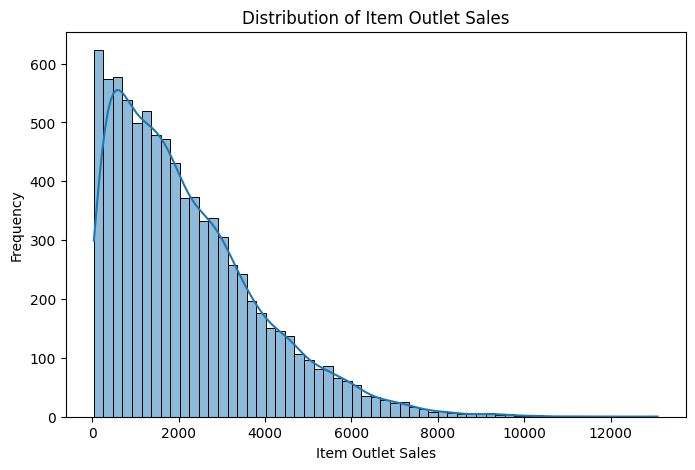

In [ ]:
# Plot histogram of the target variable (Item_Outlet_Sales)
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()


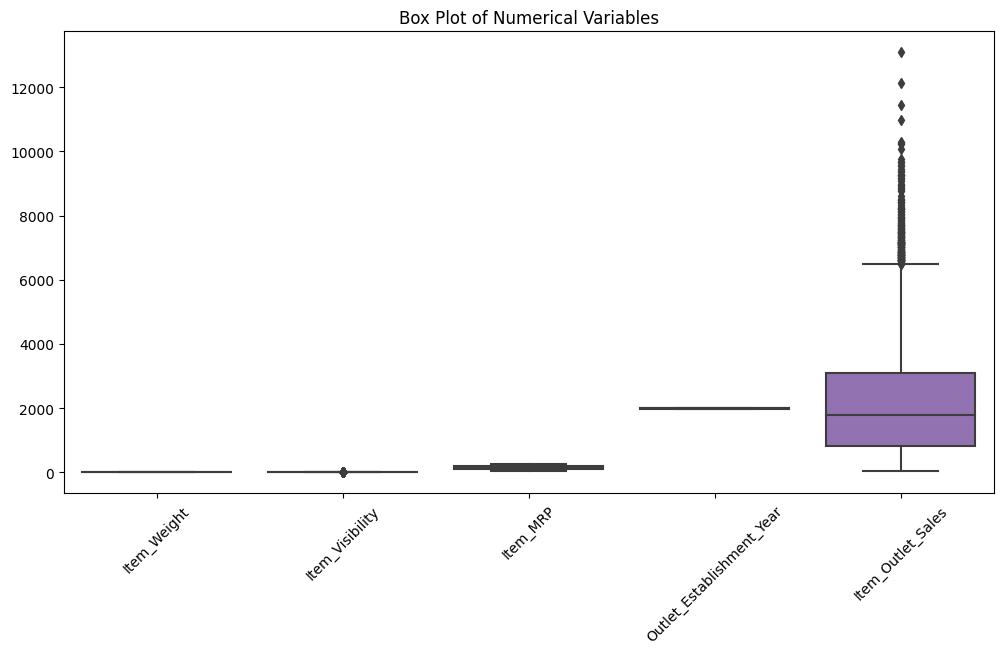

In [ ]:
# Plot box plots for numerical variables to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1))
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

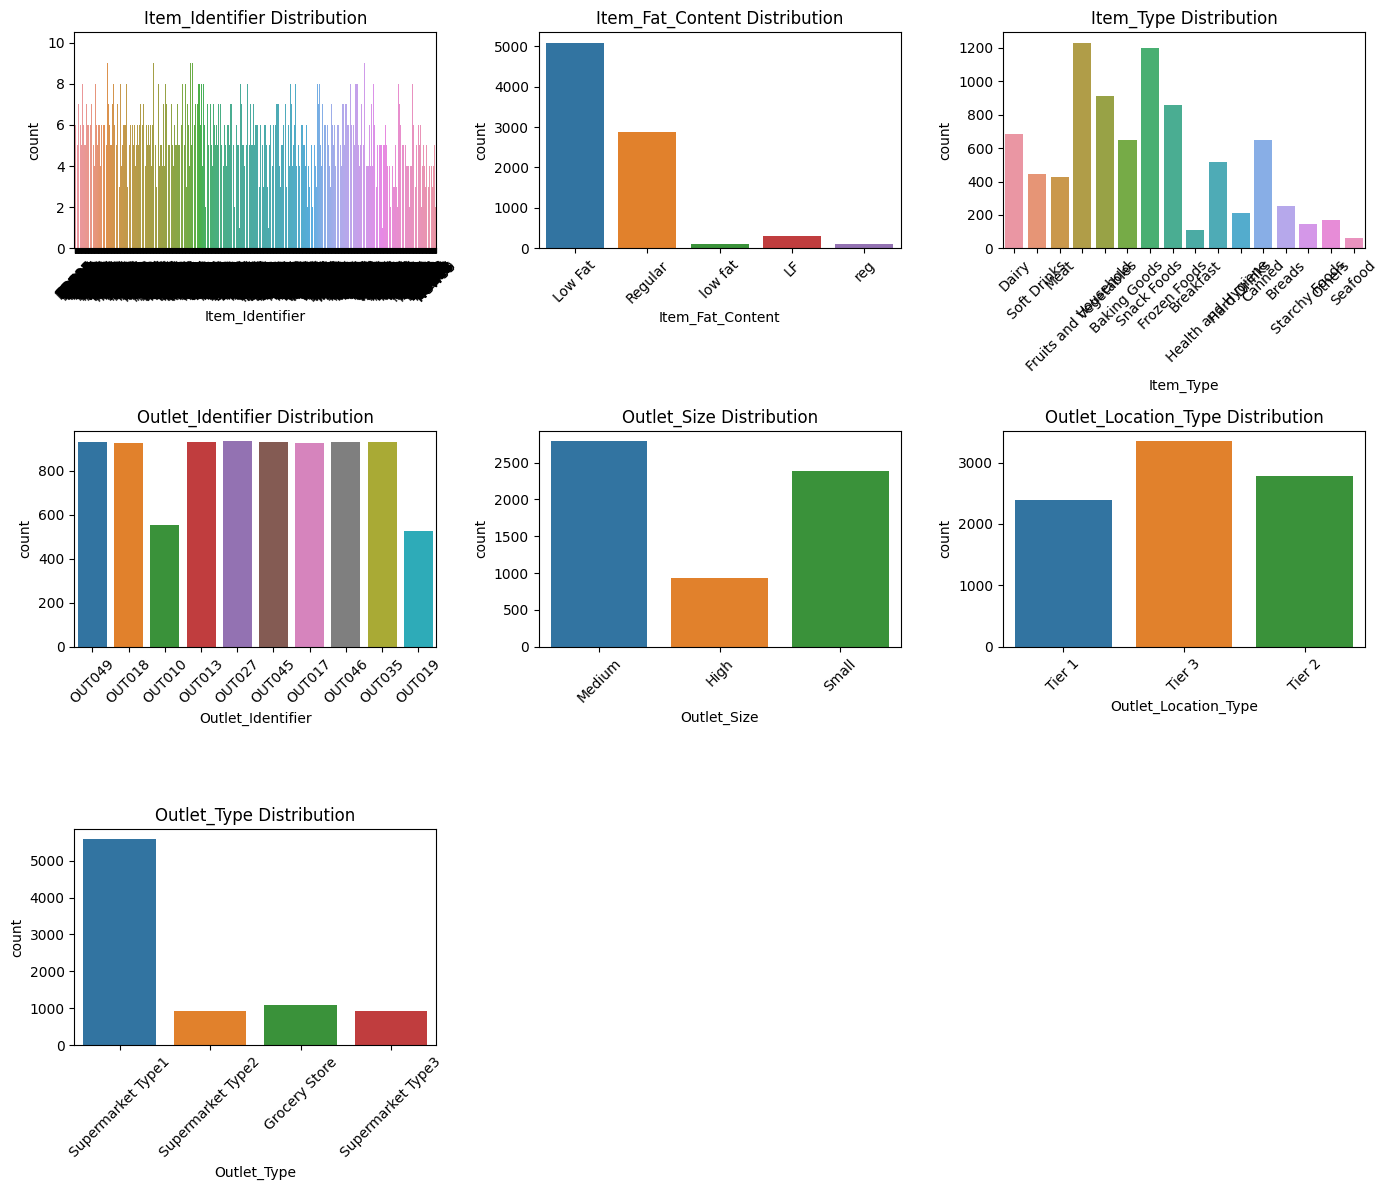

In [ ]:
# Plot bar plots for categorical variables
categorical_columns = train_data.select_dtypes(include='object').columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=train_data)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Outlier Detection using IQR method
def detect_outliers_iqr(data, col, threshold=1.5):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers



In [ ]:
# Detect outliers in the 'Item_Outlet_Sales' column
outliers_sales = detect_outliers_iqr(train_data, 'Item_Outlet_Sales', threshold=1.5)
print("Outliers in Item_Outlet_Sales:")
print(outliers_sales)

Outliers in Item_Outlet_Sales:
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
43             FDC02        21.35          Low Fat         0.069103   
130            FDY25          NaN          Low Fat         0.033810   
132            NCR53          NaN          Low Fat         0.144338   
145            FDP16        18.60          Low Fat         0.039356   
203            FDI24          NaN          Low Fat         0.078362   
...              ...          ...              ...              ...   
8245           FDU55        16.20          Low Fat         0.035967   
8329           NCQ06          NaN          Low Fat         0.041622   
8350           NCE18        10.00          Low Fat         0.021421   
8447           FDS26        20.35          Low Fat         0.089975   
8510           FDN58        13.80          Regular         0.056862   

                  Item_Type  Item_MRP Outlet_Identifier  \
43                   Canned  259.9278            OUT018  

In [ ]:
# Detect outliers in the 'Item_Weight' column
outliers_weight = detect_outliers_iqr(train_data, 'Item_Weight', threshold=1.5)
print("Outliers in Item_Weight:")
print(outliers_weight)


Outliers in Item_Weight:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [ ]:
#Detect outliers in the 'Item_Visibility' column
outliers_visibility = detect_outliers_iqr(train_data, 'Item_Visibility', threshold=1.5)
print("Outliers in Item_Visibility:")
print(outliers_visibility)



Outliers in Item_Visibility:
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
49             FDS02          NaN          Regular         0.255395   
83             NCL18          NaN          Low Fat         0.293418   
108            DRE60          NaN          low fat         0.278974   
174            FDI32        17.70          Low Fat         0.291865   
334            FDC41          NaN          Low Fat         0.204700   
...              ...          ...              ...              ...   
8292           FDF56          NaN          Regular         0.209163   
8345           FDY28          NaN          Regular         0.266397   
8371           DRA59         8.27          Regular         0.214125   
8432           FDI16        14.00          Regular         0.227261   
8509           FDG45         8.10          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
49                    Dairy  196.8794            OUT019   


In [ ]:
# Detect outliers in the 'Item_MRP' column
outliers_mrp = detect_outliers_iqr(train_data, 'Item_MRP', threshold=1.5)
print("Outliers in Item_MRP:")
print(outliers_mrp)


Outliers in Item_MRP:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [ ]:
#Detect outliers in the 'Item_Weight' column for a higher threshold (more extreme outliers)
outliers_weight_extreme = detect_outliers_iqr(train_data, 'Item_Weight', threshold=3)
print("Extreme Outliers in Item_Weight:")
print(outliers_weight_extreme)

Extreme Outliers in Item_Weight:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


**Corrolation matrix**

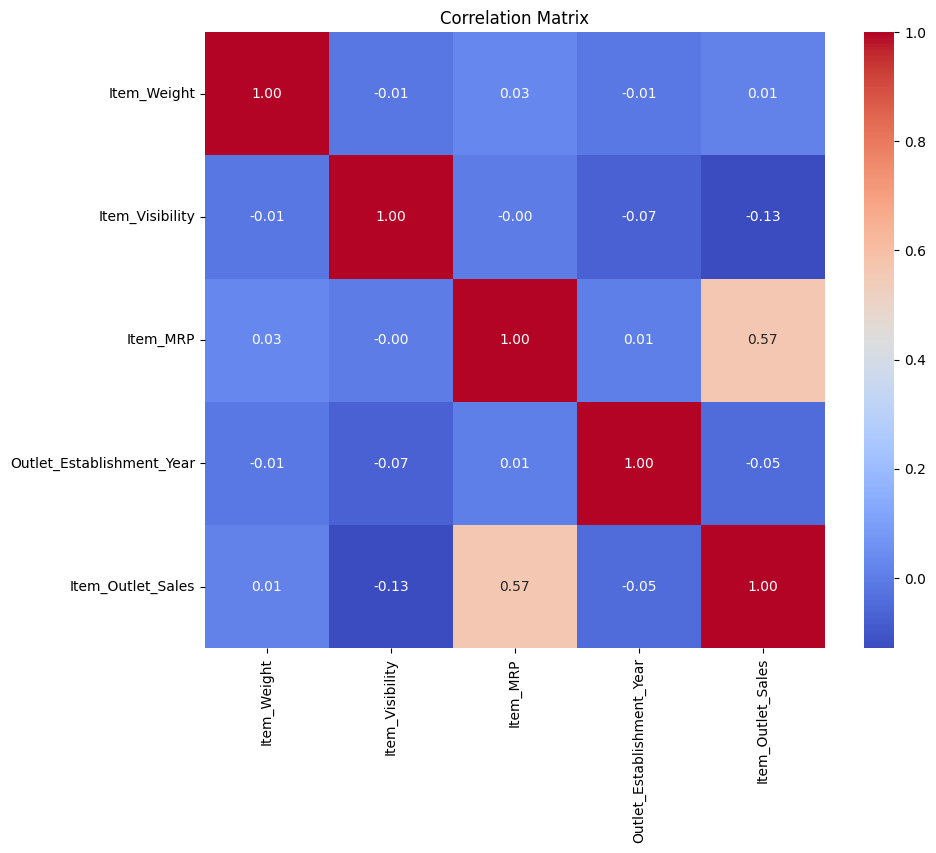

In [ ]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Univariate Analysis**

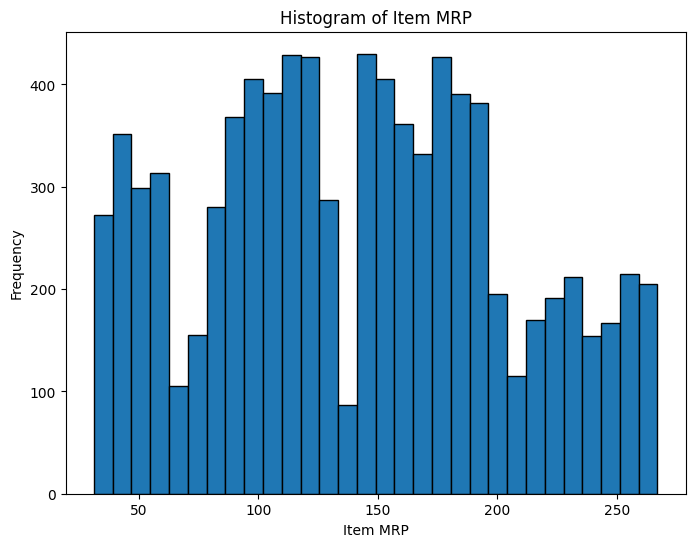

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(train_data['Item_MRP'], bins=30, edgecolor='k')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.title('Histogram of Item MRP')
plt.show()

In [ ]:
print("Summary Statistics for Item MRP:")
print(train_data['Item_MRP'].describe())

Summary Statistics for Item MRP:
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


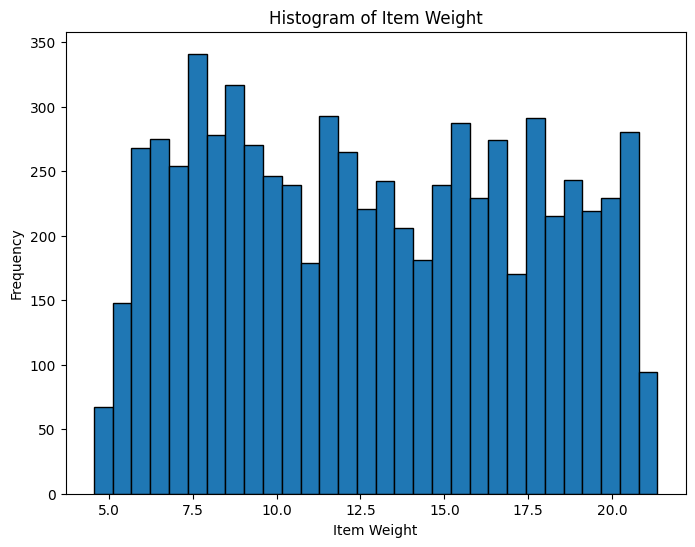

Summary Statistics for Item Weight:
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(train_data['Item_Weight'], bins=30, edgecolor='k')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Item Weight')
plt.show()
print("Summary Statistics for Item Weight:")
print(train_data['Item_Weight'].describe())

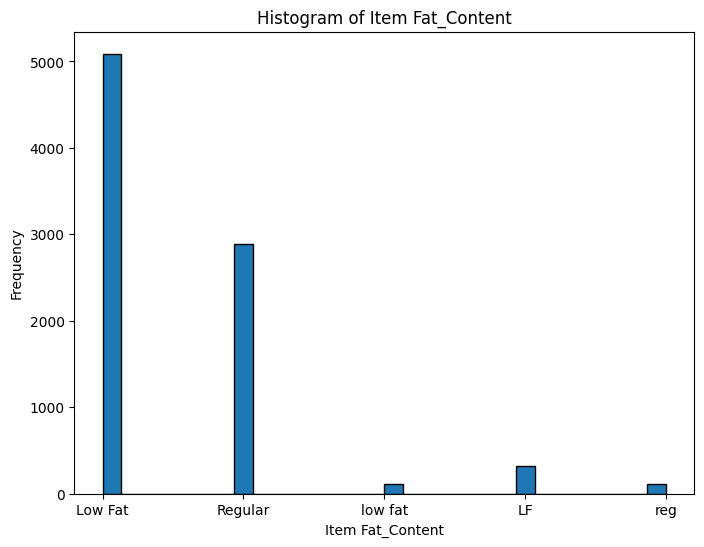

Summary Statistics for Item Fat_Content:
count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(train_data['Item_Fat_Content'], bins=30, edgecolor='k')
plt.xlabel('Item Fat_Content')
plt.ylabel('Frequency')
plt.title('Histogram of Item Fat_Content')
plt.show()
print("Summary Statistics for Item Fat_Content:")
print(train_data['Item_Fat_Content'].describe())

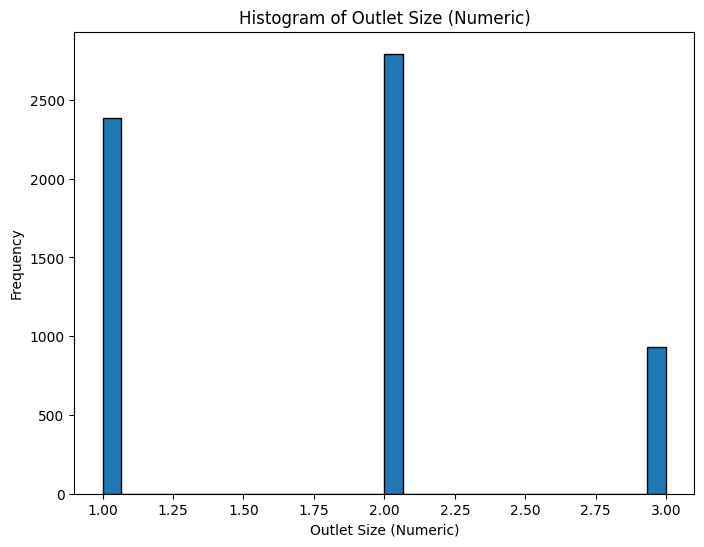

In [ ]:
size_mapping = {'Small': 1, 'Medium': 2, 'High': 3}
train_data['Outlet_Size_numeric'] = train_data['Outlet_Size'].map(size_mapping)

plt.figure(figsize=(8, 6))
plt.hist(train_data['Outlet_Size_numeric'], bins=30, edgecolor='k')
plt.xlabel('Outlet Size (Numeric)')
plt.ylabel('Frequency')
plt.title('Histogram of Outlet Size (Numeric)')
plt.show()

**Bivariate Analysis**

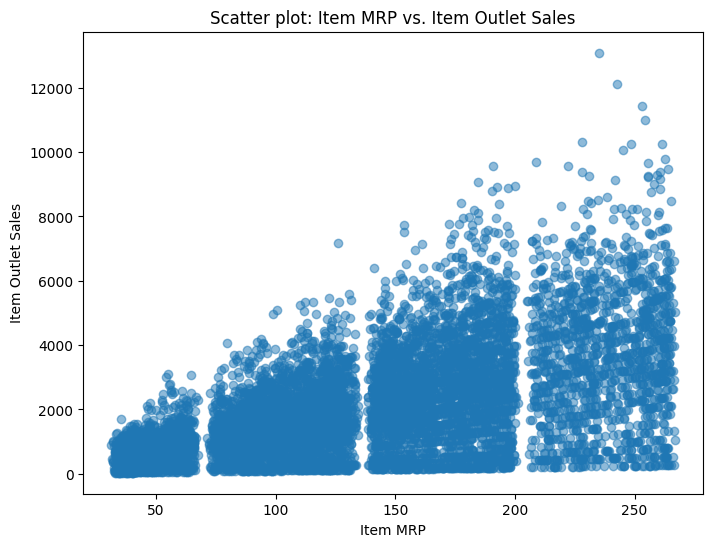

Correlation between Item MRP and Item Outlet Sales: 0.5675744466569194


In [ ]:
#Bivariate Analysis between 'Item_MRP' and 'Item_Outlet_Sales'
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'], alpha=0.5)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter plot: Item MRP vs. Item Outlet Sales')
plt.show()

# Correlation between 'Item_MRP' and 'Item_Outlet_Sales'
correlation = train_data['Item_MRP'].corr(train_data['Item_Outlet_Sales'])
print("Correlation between Item MRP and Item Outlet Sales:", correlation)

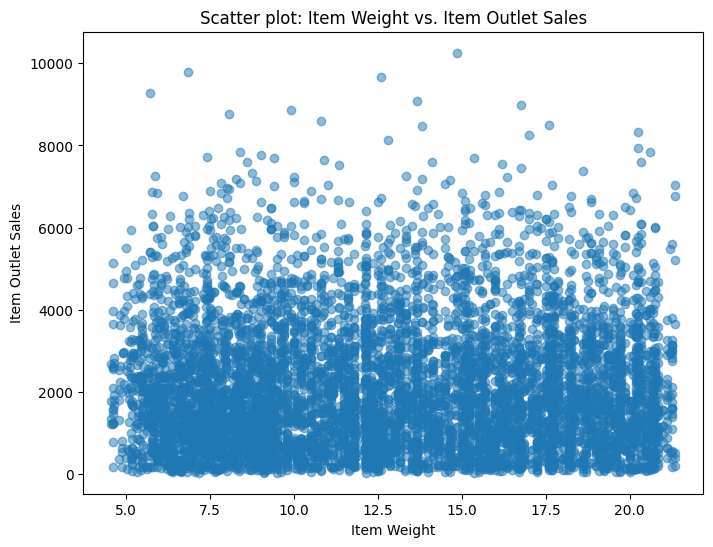

Correlation between Item Weight and Item Outlet Sales: 0.014122739280056456


In [ ]:
#Bivariate Analysis between 'Item_Weight' vs. 'Item_Outlet_Sales'
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Item_Weight'], train_data['Item_Outlet_Sales'], alpha=0.5)
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter plot: Item Weight vs. Item Outlet Sales')
plt.show()

# Correlation between 'Item_Weight' vs. 'Item_Outlet_Sales'
correlation = train_data['Item_Weight'].corr(train_data['Item_Outlet_Sales'])
print("Correlation between Item Weight and Item Outlet Sales:", correlation)

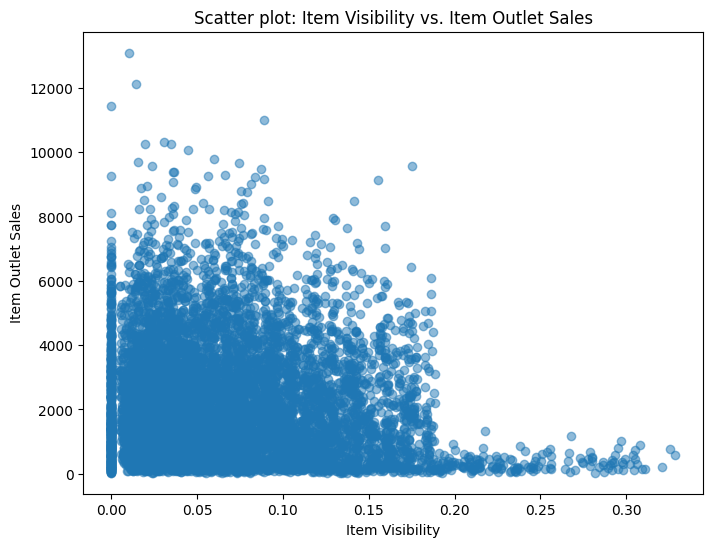

Correlation between Item Visibility and Item Outlet Sales: -0.12862461222077026


In [ ]:

# Bivariate Analysis between 'Item_Visibility' and 'Item_Outlet_Sales'
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Item_Visibility'], train_data['Item_Outlet_Sales'], alpha=0.5)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter plot: Item Visibility vs. Item Outlet Sales')
plt.show()

# Correlation between 'Item_Visibility' and 'Item_Outlet_Sales'
correlation = train_data['Item_Visibility'].corr(train_data['Item_Outlet_Sales'])
print("Correlation between Item Visibility and Item Outlet Sales:", correlation)

**Multivariat plot**

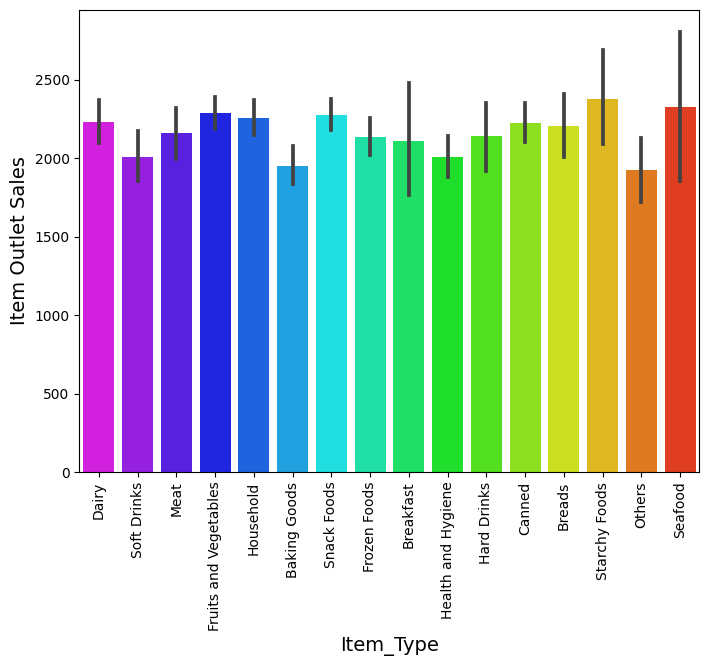

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data, palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Item Outlet Sales', fontsize=14)
plt.show()

**Missing Value Treatment**

In [ ]:
# Impute missing values for Item_Weight with mean
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

# Impute missing values for Outlet_Size with mode
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:

train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

size_mapping = {'Small': 1, 'Medium': 2, 'High': 3}

train_data['Outlet_Size_numeric'] = train_data['Outlet_Size'].map(size_mapping)

In [ ]:
print("Columns with Missing Values after Treatment:")
print(train_data.isnull().sum())

Columns with Missing Values after Treatment:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Size_numeric          0
dtype: int64


**Feature engineering**

Let's drop Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier because they don't have significant values.

In [ ]:
train_data = pd.read_csv(train_csv_path)
train_data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'], inplace=True)



Laabel encoding for ordinal variables:

In [ ]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['Item_Fat_Content', 'Outlet_Size']

le = LabelEncoder()
for col in ordinal_columns:
    train_data[col] = le.fit_transform(train_data[col])



One-hot encoding for categorical variables


In [ ]:
# Perform one-hot encoding only if it wasn't done before
if 'Outlet_Type_Supermarket Type1' not in train_data.columns:
    train_data = pd.get_dummies(train_data, columns=['Outlet_Type'], prefix_sep='')

if 'Item_Type_Breads' not in train_data.columns:
    train_data = pd.get_dummies(train_data, columns=['Item_Type'], prefix_sep='')

# Print the new columns after one-hot encoding
print(train_data.columns)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods'],
      dtype='object')


Verify the updated dataset


In [ ]:
print(train_data.head())

   Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP Outlet_Size  \
0         9.30          Low Fat         0.016047  249.8092      Medium   
1         5.92          Regular         0.019278   48.2692      Medium   
2        17.50          Low Fat         0.016760  141.6180      Medium   
3        19.20          Regular         0.000000  182.0950         NaN   
4         8.93          Low Fat         0.000000   53.8614        High   

  Outlet_Location_Type  Item_Outlet_Sales  Outlet_Type_Supermarket Type1  \
0               Tier 1          3735.1380                              1   
1               Tier 3           443.4228                              0   
2               Tier 1          2097.2700                              1   
3               Tier 3           732.3800                              0   
4               Tier 3           994.7052                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  ...  \
0                         

**Modeling**

**Linear regretion**

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
train_data = pd.get_dummies(train_data, drop_first=True)

# Handle missing values (if any) in numerical columns
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Get the coefficients and intercept of the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)



Coefficients: [-1.68833320e+00 -4.67378665e+02  1.56527153e+01  1.93171055e+03
  1.63935617e+03  3.36008006e+03 -2.79269653e+01  7.30565970e+01
  2.39431904e+01 -8.99367316e+01 -1.06483781e+01  4.37968381e+01
  4.81514282e+00  1.43473800e+01 -1.51815681e+01  1.79799349e+00
 -4.80450177e+01  2.23610223e+02 -8.25414782e+00 -2.94720394e+01
  3.23291114e+01 -4.54720913e+01  2.87176157e+00  5.14871565e+01
  5.62510761e+01 -6.51379029e+01 -5.81229173e+01 -3.84800097e+01
  2.28871414e+01 -1.45347364e+01]
Intercept: -1752.7284864388266
Mean Squared Error: 1148058.614413749
Mean Absolute Error: 793.384701433418
R-squared: 0.577604393619084


In [ ]:
# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


# Create a DataFrame with the predictions
df_predictions = pd.DataFrame({'Item_Outlet_Sales_Predicted': y_pred})

# Merge the predictions DataFrame with the original test DataFrame
df_merged = pd.concat([test_data, df_predictions], axis=1)
df_merged = df_merged[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales_Predicted']]

# Save the merged DataFrame to a CSV file
df_merged.to_csv('predictions.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('predictions.csv')


Mean Squared Error: 1148058.614413749
Mean Absolute Error: 793.384701433418
R-squared: 0.577604393619084


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Regularized Linear Regression**

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=0.05)  # You can adjust the alpha (regularization strength)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Get the coefficients and intercept of the model
coefficients_ridge = ridge_model.coef_
intercept_ridge = ridge_model.intercept_

# Print the coefficients and intercept
print("Ridge Coefficients:", coefficients_ridge)
print("Ridge Intercept:", intercept_ridge)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Mean Squared Error:", mse_ridge)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Ridge Mean Absolute Error:", mae_ridge)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge R-squared:", r2_ridge)

Ridge Coefficients: [-1.68816595e+00 -4.66893682e+02  1.56527194e+01  1.93142530e+03
  1.63869410e+03  3.35930813e+03 -2.79409968e+01  7.29625671e+01
  2.39328104e+01 -8.99534805e+01 -1.06649493e+01  4.37798002e+01
  4.79786010e+00  1.43312851e+01 -1.51994604e+01  1.77508635e+00
 -4.80567530e+01  2.23366883e+02 -8.26257923e+00 -2.94858358e+01
  3.23103894e+01 -4.54609384e+01  2.87374307e+00  5.14858363e+01
  5.62070883e+01 -6.51057292e+01 -5.78484474e+01 -3.82553198e+01
  2.29396591e+01 -1.42305046e+01]
Ridge Intercept: -1752.7710383004514
Ridge Mean Squared Error: 1148051.0656017615
Ridge Mean Absolute Error: 793.3764915964225
Ridge R-squared: 0.5776071709903584


In [ ]:
# Create a DataFrame with the predictions
df_predictions_ridge = pd.DataFrame({'Item_Outlet_Sales_Predicted_Ridge': y_pred_ridge})

# Merge the predictions DataFrame with the original test DataFrame
df_merged_ridge = pd.concat([test_data, df_predictions_ridge], axis=1)
df_merged_ridge = df_merged_ridge[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales_Predicted_Ridge']]

# Save the merged DataFrame to a CSV file
df_merged_ridge.to_csv('predictions_ridge.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('predictions_ridge.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.05)  # You can adjust the alpha (regularization strength)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Get the coefficients and intercept of the model
coefficients_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

# Print the coefficients and intercept
print("Lasso Coefficients:", coefficients_lasso)
print("Lasso Intercept:", intercept_lasso)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Mean Squared Error:", mse_lasso)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Mean Absolute Error:", mae_lasso)

r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso R-squared:", r2_lasso)

Lasso Coefficients: [-1.67952052e+00 -4.48722409e+02  1.56528002e+01  1.93513207e+03
  1.63583211e+03  3.35669072e+03 -2.67722910e+01  6.80774705e+01
  2.26324858e+01 -9.00046681e+01 -1.08880586e+01  4.27881260e+01
  2.39430755e+00  1.30667113e+01 -1.53119095e+01  9.84141093e-02
 -4.61379929e+01  2.15856391e+02 -8.47773278e+00 -2.90994856e+01
  2.87146238e+01 -4.70997133e+01 -0.00000000e+00  4.85753763e+01
  4.96604761e+01 -6.41997565e+01 -5.07226553e+01 -3.02181263e+01
  2.24372838e+01 -8.09117540e+00]
Lasso Intercept: -1761.3196424865364
Lasso Mean Squared Error: 1147746.9175540002
Lasso Mean Absolute Error: 793.1968254286099
Lasso R-squared: 0.5777190736384032


In [ ]:
# Create a DataFrame with the predictions
df_predictions_lasso = pd.DataFrame({'Item_Outlet_Sales_Predicted_Lasso': y_pred_lasso})

# Merge the predictions DataFrame with the original test DataFrame
df_merged_lasso = pd.concat([test_data, df_predictions_lasso], axis=1)
df_merged_lasso = df_merged_lasso[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales_Predicted_Lasso']]

# Save the merged DataFrame to a CSV file
df_merged_lasso.to_csv('predictions_lasso.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('predictions_lasso.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Mean Absolute Error:", mae_rf)

r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 1223650.6858585412
Random Forest Mean Absolute Error: 772.4898577372435
Random Forest R-squared: 0.5497924348439502


In [ ]:
# Create a DataFrame with the predictions
df_predictions_rf = pd.DataFrame({'Item_Outlet_Sales_Predicted_RF': y_pred_rf})

# Merge the predictions DataFrame with the original test DataFrame
df_merged_rf = pd.concat([test_data, df_predictions_rf], axis=1)
df_merged_rf = df_merged_rf[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales_Predicted_RF']]

# Save the merged DataFrame to a CSV file
df_merged_rf.to_csv('predictions_rf.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('predictions_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>